In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import matplotlib.pyplot as plt

In [15]:
Ravdess = "C:/Python/PlayArea/speech-emotion-recognition-ravdess-data/"

In [74]:
ravdess_directory_list = os.listdir(Ravdess)

Emotion = []
Gender = []
Modality = []
Vocal_channel = []
Emotional_intensity = []
Statement = []
Repetition = []
File_Name = []
File_Path = []

for dir in ravdess_directory_list:
    Speech_List = os.listdir(Ravdess + dir)
    for FindEmotion in Speech_List:
        FindEmotion1 = FindEmotion.split('.')[0]
        FindEmotion1 = FindEmotion1.split('-')
        # third part in each file represents the emotion associated to that file.
        Modality.append(int(FindEmotion1[0]))
        Vocal_channel.append(int(FindEmotion1[1]))
        Emotion.append(int(FindEmotion1[2]))
        Emotional_intensity.append(int(FindEmotion1[3]))
        Statement.append(int(FindEmotion1[4]))
        Repetition.append(int(FindEmotion1[5]))
        Gender.append(int(FindEmotion1[6]))
        File_Name.append(FindEmotion)
        File_Path.append(Ravdess + dir)

In [76]:
Modality_df = pd.DataFrame(Modality, columns=['Modality'])
Vocal_channel_df = pd.DataFrame(Vocal_channel, columns=['Vocal_Channel'])
Emotion_df = pd.DataFrame(Emotion, columns=['Emotions'])
Emotional_intensity_df = pd.DataFrame(Emotional_intensity, columns=['Emotional_Intensity'])
Statement_df = pd.DataFrame(Statement, columns=['Statement'])
Repetition_df = pd.DataFrame(Repetition, columns=['Repetition'])
Gender_df = pd.DataFrame(Gender, columns=['Gender'])
File_Name_df = pd.DataFrame(File_Name, columns=['File_Name'])
File_Path_df = pd.DataFrame(File_Path, columns=['File_Path'])

In [77]:
Modality_df.Modality.replace({1:'Full-AV', 2:'Video-Only', 3:'Audio-Only'}, inplace=True)
Vocal_channel_df.Vocal_Channel.replace({1:'Speech', 2:'Song'}, inplace=True)
Emotion_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Emotional_intensity_df.Emotional_Intensity.replace({1:'Normal', 2:'Strong'}, inplace=True)
Statement_df.Statement.replace({1:'Kids are talking by the door', 2:'Dogs are sitting by the door'}, inplace=True)
Repetition_df.Repetition.replace({1:'1st repetition', 2:'2nd repetition'}, inplace=True)

Gender_df = Gender_df.apply(lambda x: "Male" if(x.Gender%2!=0) else "Female", axis=1)
Gender_df = pd.DataFrame(Gender_df, columns=['Gender'])

Ravdess_df = pd.concat([File_Path_df,File_Name_df,Modality_df,Vocal_channel_df,Emotion_df, Emotional_intensity_df,Statement_df,Repetition_df,Gender_df], axis=1)


In [78]:
Ravdess_df.head()

,File_Path,File_Name,Modality,Vocal_Channel,Emotions,Emotional_Intensity,Statement,Repetition,Gender
0,C:/Python/PlayArea/speech-emotion-recognition-...,03-01-01-01-01-01-01.wav,Audio-Only,Speech,neutral,Normal,Kids are talking by the door,1st repetition,Male
1,C:/Python/PlayArea/speech-emotion-recognition-...,03-01-01-01-01-02-01.wav,Audio-Only,Speech,neutral,Normal,Kids are talking by the door,2nd repetition,Male
2,C:/Python/PlayArea/speech-emotion-recognition-...,03-01-01-01-02-01-01.wav,Audio-Only,Speech,neutral,Normal,Dogs are sitting by the door,1st repetition,Male
3,C:/Python/PlayArea/speech-emotion-recognition-...,03-01-01-01-02-02-01.wav,Audio-Only,Speech,neutral,Normal,Dogs are sitting by the door,2nd repetition,Male
4,C:/Python/PlayArea/speech-emotion-recognition-...,03-01-02-01-01-01-01.wav,Audio-Only,Speech,calm,Normal,Kids are talking by the door,1st repetition,Male


In [79]:
Ravdess_df.to_csv("C:/Python/PlayArea/speech-emotion-recognition-ravdess-data.csv", sep=',')

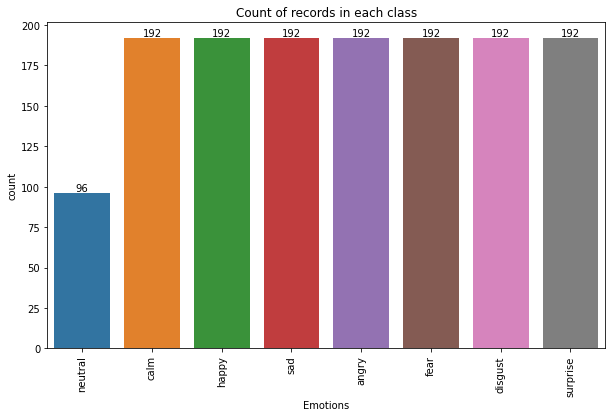

In [87]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=Ravdess_df,x="Emotions")
ax.bar_label(ax.containers[0])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

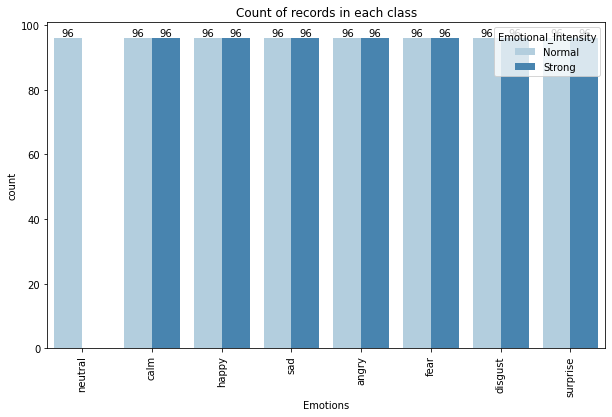

In [91]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=Ravdess_df,x="Emotions",hue="Emotional_Intensity",palette = 'Blues')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

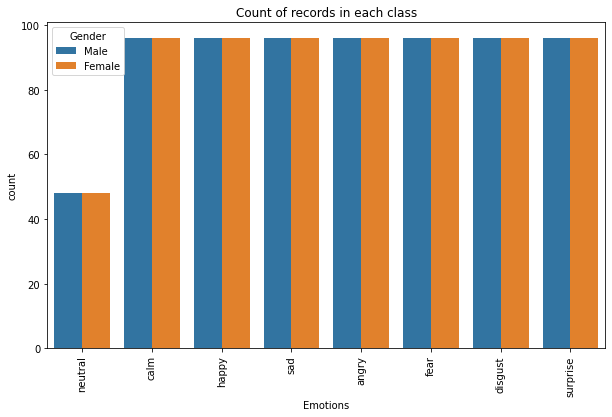

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Ravdess_df,x="Emotions",hue="Gender")
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [10]:
import IPython.display as ipd
calm_male_file = "C:/Python/PlayArea/speech-emotion-recognition-ravdess-data/Actor_01/03-01-02-01-01-01-01.wav"
ipd.Audio(calm_male_file)

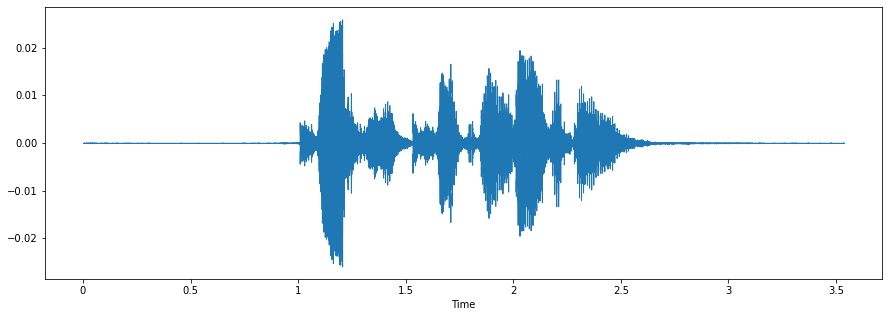

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sample_rate = librosa.load(calm_male_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [23]:
calm_female_file = "C:/Python/PlayArea/speech-emotion-recognition-ravdess-data/Actor_02/03-01-02-01-01-01-02.wav"
ipd.Audio(calm_female_file)

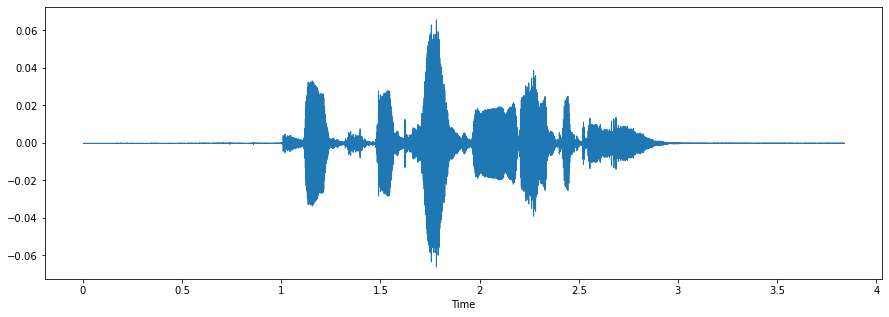

In [26]:
data, sample_rate = librosa.load(calm_female_file, res_type='kaiser_fast')
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sample_rate)